# Skin_Cancer_Detection

## The dataset consists of 10015 dermatoscopic images which can serve as a training set for  machine learning purposes. The objective to build deep learning model to classify given query image into one of the 7 different classes of skin cancer.

This the HAM10000 ("Human Against Machine with 10000 training images") dataset.It consists of 10015 dermatoscopicimages which are released as a training set for academic machine learning purposes.

It has 7 different classes of skin cancer which are listed below :
1. Melanocytic nevi
2. Melanoma
3. Benign keratosis-like lesions
4. Basal cell carcinoma
5. Actinic keratoses
6. Vascular lesions
7. Dermatofibroma

In this kernel I have followed following 10 steps for model building and evaluation which are as follows :

Step 1: Importing Essential Libraries

Step 2: Loading data

Step 3: Train Test Split

Step 4: Exploratory data analysis (EDA)

Step 5: Model Building (CNN)

Step 6: Setting Optimizer & Annealing

Step 7: Fitting the model

Step 8: Model Evaluation

step 9: Saving the Model

Step 10: Testing and Prediction

# Step 1: Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Step 2: Loading data

In [2]:
df=pd.read_csv("hmnist_28_28_RGB.csv")
df.tail(10)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10005,141,103,90,155,113,105,166,122,112,176,...,186,147,126,177,140,121,163,129,110,0
10006,201,150,151,209,163,159,220,175,164,227,...,138,98,93,113,72,67,114,73,70,0
10007,26,13,19,25,10,17,24,6,5,23,...,22,6,9,27,9,10,23,5,6,0
10008,178,134,148,178,142,158,201,171,192,208,...,196,152,148,198,158,160,197,155,158,0
10009,166,157,156,166,157,156,165,156,158,167,...,172,163,154,165,155,146,159,151,143,0
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train Test Split

In [3]:
fractions=np.array([0.8,0.2]) #fraction variable contains 80% Training and 20% Testing

df=df.sample(frac=1) #shuffles the rows

train_set, test_set = np.array_split(  df, ( fractions[:-1].cumsum() * len(df) ).astype(int) ) 

In [4]:
print(len(train_set))

8012


In [5]:
print(len(test_set))

2003


In [6]:
df.label.unique()

array([4, 6, 2, 0, 1, 3, 5], dtype=int64)

In [7]:
# Different classes of skin cancer data, from kaggle as reference. 
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         
    1:('bcc' , 'basal cell carcinoma'),
         
    2:('bkl', 'benign keratosis-like lesions'),
         
    3:('df', 'dermatofibroma'),
         
    4:('nv', ' melanocytic nevi'),
         
    5:('vasc', ' pyogenic granulomas and hemorrhage'),
         
    6:('mel', 'melanoma'),
}

In [8]:
x_train, y_train, x_test, y_test = train_set.drop(columns=['label']), train_set['label'], test_set.drop(columns=['label']), test_set['label']

columns = list(x_train)
columns

['pixel0000',
 'pixel0001',
 'pixel0002',
 'pixel0003',
 'pixel0004',
 'pixel0005',
 'pixel0006',
 'pixel0007',
 'pixel0008',
 'pixel0009',
 'pixel0010',
 'pixel0011',
 'pixel0012',
 'pixel0013',
 'pixel0014',
 'pixel0015',
 'pixel0016',
 'pixel0017',
 'pixel0018',
 'pixel0019',
 'pixel0020',
 'pixel0021',
 'pixel0022',
 'pixel0023',
 'pixel0024',
 'pixel0025',
 'pixel0026',
 'pixel0027',
 'pixel0028',
 'pixel0029',
 'pixel0030',
 'pixel0031',
 'pixel0032',
 'pixel0033',
 'pixel0034',
 'pixel0035',
 'pixel0036',
 'pixel0037',
 'pixel0038',
 'pixel0039',
 'pixel0040',
 'pixel0041',
 'pixel0042',
 'pixel0043',
 'pixel0044',
 'pixel0045',
 'pixel0046',
 'pixel0047',
 'pixel0048',
 'pixel0049',
 'pixel0050',
 'pixel0051',
 'pixel0052',
 'pixel0053',
 'pixel0054',
 'pixel0055',
 'pixel0056',
 'pixel0057',
 'pixel0058',
 'pixel0059',
 'pixel0060',
 'pixel0061',
 'pixel0062',
 'pixel0063',
 'pixel0064',
 'pixel0065',
 'pixel0066',
 'pixel0067',
 'pixel0068',
 'pixel0069',
 'pixel0070',
 'pixe

# Step 4: Exploratory Data Analysis and Preprocessing

In [9]:
df.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483,3.720919
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028,1.347499
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000,4.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000,4.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000,4.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000,6.000000


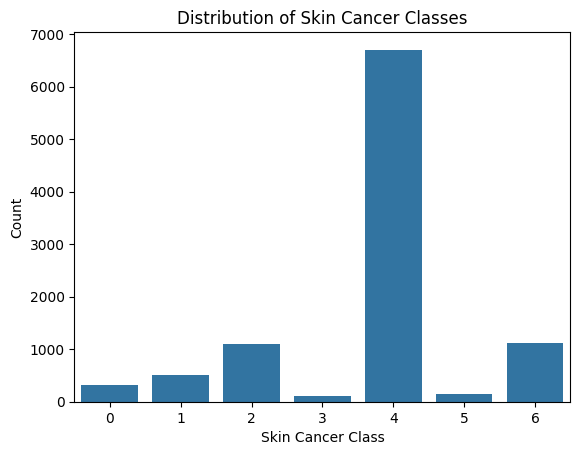

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of label counts
sns.countplot(data=df, x='label')
plt.xlabel('Skin Cancer Class')
plt.ylabel('Count')
plt.title('Distribution of Skin Cancer Classes')
plt.show()

In [11]:
df['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [12]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

In [13]:
# sns.countplot(y_train)

## Random Images

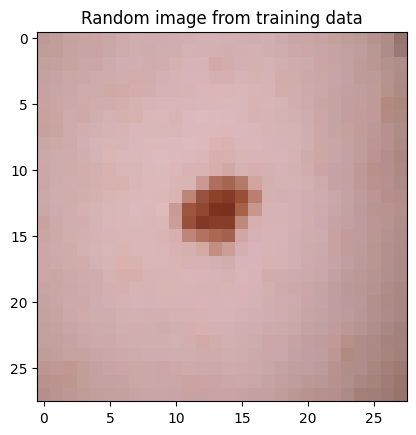

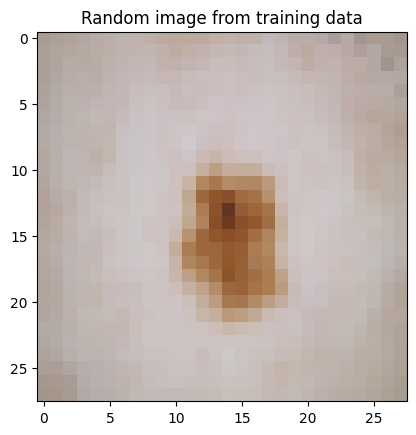

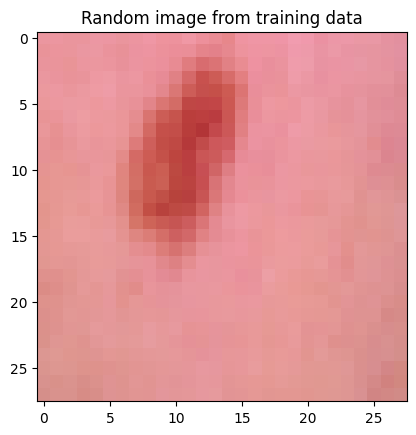

In [14]:
import matplotlib.pyplot as plt
import random


x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Step 5: Model Building (CNN)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [16]:
#https://keras.io/api/models/sequential/
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/merging_layers/add/
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization


%time 

model = Sequential()

model.add(Conv2D(16, 
                 kernel_size = (3,3), 
                 input_shape = (28, 28, 3), 
                 activation = 'relu', 
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(256, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 

# Step 6: Setting Optimizer & Annealing

---



In [17]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [18]:
%time 

optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


# Step 7: Fitting the model

In [19]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
234/234 [==============================] - 51s 192ms/step - loss: 1.1569 - accuracy: 0.5895 - val_loss: 2.4920 - val_accuracy: 0.0784
Epoch 2/50
234/234 [==============================] - 46s 197ms/step - loss: 0.3876 - accuracy: 0.8730 - val_loss: 1.6206 - val_accuracy: 0.3826
Epoch 3/50
234/234 [==============================] - 45s 191ms/step - loss: 0.2546 - accuracy: 0.9136 - val_loss: 1.4952 - val_accuracy: 0.4878
Epoch 4/50
234/234 [==============================] - 42s 179ms/step - loss: 0.1948 - accuracy: 0.9333 - val_loss: 0.8454 - val_accuracy: 0.5724
Epoch 5/50
234/234 [==============================] - 42s 181ms/step - loss: 0.1554 - accuracy: 0.9470 - val_loss: 1.2896 - val_accuracy: 0.4751
Epoch 6/50
234/234 [==============================] - 41s 174ms/step - loss: 0.1264 - accuracy: 0.9563 - val_loss: 0.7427 - val_accuracy: 0.6932
Epoch 7/50
234/234 [==============================] - 40s 171ms/step - loss: 0.1151 - accuracy: 0.9596 - val_loss: 0.4097 - val_ac

# Step 8: Model Evaluation

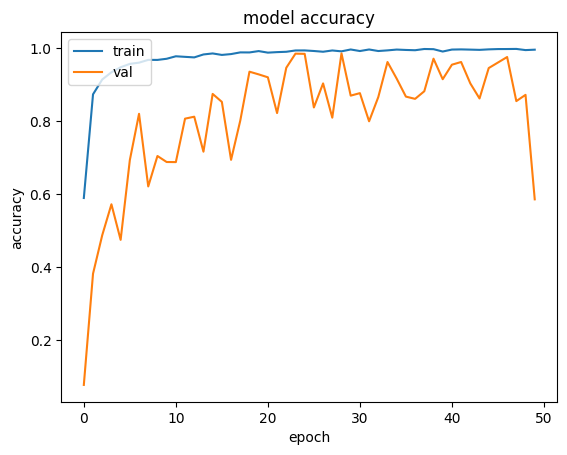

In [20]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

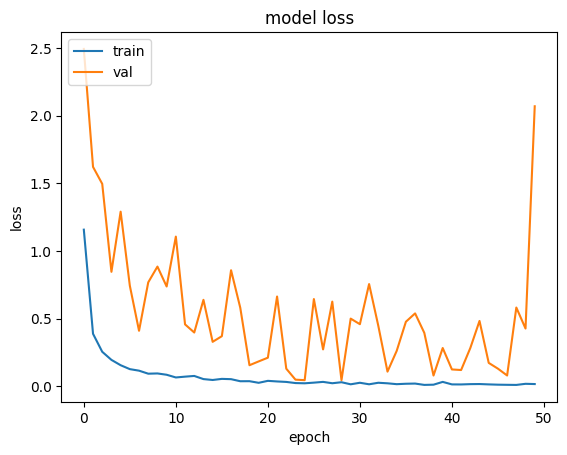

In [21]:
#plot of loss vs epoch

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [22]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.7509 - accuracy: 0.7099 - 1000ms/epoch - 16ms/step


## Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 [==============================] - 1s 13ms/step


In [24]:
print(conf_mat)

[[  20   22    6    0   18    0    1]
 [   8   54    7    2   22    0    4]
 [  14   27   54    0  109    0   19]
 [   2    5    1    2   11    0    0]
 [  12   31   43    0 1255    0   19]
 [   0    4    0    0   14    4    1]
 [   7    8   22    0  142    0   33]]


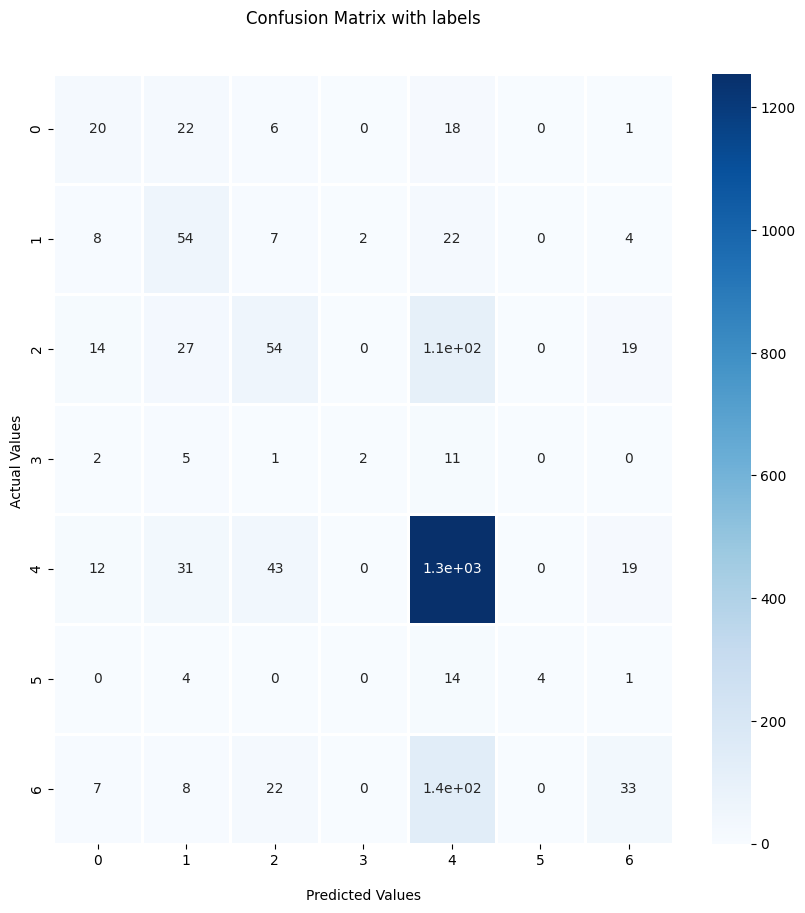

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 

ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n')

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

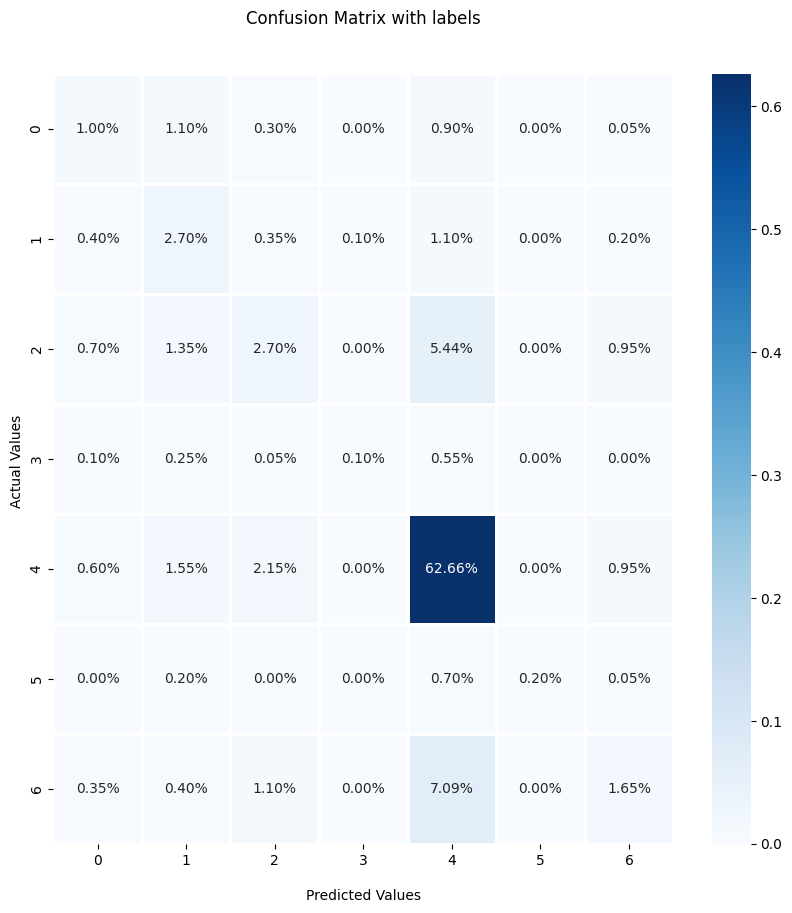

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 

ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

# Step 9: Saving the Model

In [27]:
model.save("skin_cancer.h5")

# Step 10: Testing and Prediction

In [28]:
#https://pillow.readthedocs.io/en/stable/

import cv2
import os
from PIL import Image

directory = 'Test Images'

for subdir, dir, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(subdir, file)
        if file_path.endswith('.jpg') or file_path.endswith('.jpeg') or file_path.endswith('.png'):
            # Load the image using PIL library
            image = Image.open(file_path)
            image=image.resize((28,28))
            img=x_test[1]
            img=np.array(image).reshape(-1,28,28,3)
            result=model.predict(img)
            #print(result[0])
            
            print("True label:",file_path)
            
            result=result.tolist()
            max_prob=max(result[0])
            class_ind=result[0].index(max_prob)
            print("Predicted label:",classes[class_ind])
            
            test_img=cv2.imread(file_path)
            plt.imshow(test_img)
            plt.show()
            

In [ ]:
image = Image.open(file_path)
            image=image.resize((28,28))
            img=x_test[1]
            img=np.array(image).reshape(-1,28,28,3)
            result=model.predict(img)